<a id="mod1"></a>
<h2 name='mod1'>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Data Preparation and Preprocessing
            </span>   
        </font>    
</h2>

<a id="lib"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Import Necessary Libraries
            </span>   
        </font>    
</h3>

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img , img_to_array, array_to_img
from keras.callbacks import EarlyStopping

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id="load"></a>
<h3 name='load'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Loading Necessary Directories & Data
            </span>   
        </font>    
</h3>

In [2]:
base_dir = 'C:/Users/chowd/Documents/Artificial Intelligence & Deep Learning/Project/Dog Emotion'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_angry_dir = os.path.join(train_dir, 'angry')
train_relaxed_dir = os.path.join(train_dir, 'relaxed')
train_happy_dir = os.path.join(train_dir, 'happy')
train_sad_dir = os.path.join(train_dir, 'sad')

validation_angry_dir = os.path.join(validation_dir, 'angry')
validation_relaxed_dir = os.path.join(validation_dir, 'relaxed')
validation_happy_dir = os.path.join(validation_dir, 'happy')
validation_sad_dir = os.path.join(validation_dir, 'sad')

test_angry_dir = os.path.join(test_dir, 'angry')
test_relaxed_dir = os.path.join(test_dir, 'relaxed')
test_happy_dir = os.path.join(test_dir, 'happy')
test_sad_dir = os.path.join(test_dir, 'sad')

print('total training angry images:', len(os.listdir(train_angry_dir)))
print('total training relaxed images:', len(os.listdir(train_relaxed_dir)))
print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))

print('total validation angry images:', len(os.listdir(validation_angry_dir)))
print('total validation relaxed images:', len(os.listdir(validation_relaxed_dir)))
print('total validation happy images:', len(os.listdir(validation_happy_dir)))
print('total validation sad images:', len(os.listdir(validation_sad_dir)))

print('total test angry images:', len(os.listdir(test_angry_dir)))
print('total test relaxed images:', len(os.listdir(test_relaxed_dir)))
print('total test happy images:', len(os.listdir(test_happy_dir)))
print('total test sad images:', len(os.listdir(test_sad_dir)))

# Loading the Data
labels_df = pd.read_csv( "C:/Users/chowd/Documents/Artificial Intelligence & Deep Learning/Project//Dog Emotion/labels.csv" )
labels_df.info()

total training angry images: 800
total training relaxed images: 800
total training happy images: 800
total training sad images: 800
total validation angry images: 150
total validation relaxed images: 150
total validation happy images: 150
total validation sad images: 150
total test angry images: 50
total test relaxed images: 50
total test happy images: 50
total test sad images: 50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4000 non-null   int64 
 1   filename    4000 non-null   object
 2   label       4000 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


<a id="aug"></a>
<h3 name='aug'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Data Augmentation
            </span>   
        </font>    
</h3>

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


<a id="mod1"></a>
<h2 name='mod1'>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Model 1: CNN Model
            </span>   
        </font>    
</h2>

<a id="mod"></a>
<h3 name='mod'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Building our model
            </span>   
        </font>    
</h3>

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))  # 4 classes: angry, relaxed, happy, sad

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

<a id="train"></a>
<h3 name='train'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Train the model
            </span>   
        </font>    
</h3>

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/15


100/100 [==============================] - 68s 645ms/step - loss: 1.3857 - accuracy: 0.2559 - val_loss: 1.3714 - val_accuracy: 0.3212
Epoch 2/15
100/100 [==============================] - 60s 599ms/step - loss: 1.3389 - accuracy: 0.3122 - val_loss: 1.3063 - val_accuracy: 0.3247
Epoch 3/15
100/100 [==============================] - 57s 573ms/step - loss: 1.3211 - accuracy: 0.3294 - val_loss: 1.2693 - val_accuracy: 0.3490
Epoch 4/15
100/100 [==============================] - 67s 666ms/step - loss: 1.2880 - accuracy: 0.3419 - val_loss: 1.2556 - val_accuracy: 0.3542
Epoch 5/15
100/100 [==============================] - 59s 585ms/step - loss: 1.2865 - accuracy: 0.3569 - val_loss: 1.2189 - val_accuracy: 0.4132
Epoch 6/15
100/100 [==============================] - 56s 561ms/step - loss: 1.2606 - accuracy: 0.3762 - val_loss: 1.2079 - val_accuracy: 0.4115
Epoch 7/15
100/100 [==============================] - 56s 560ms/step - loss: 1.2365 - accuracy: 0.4087 - val_loss: 1.2013 - val_

<a id="save"></a>
<h3 name='save'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Saving our model
            </span>   
        </font>    
</h3>

In [6]:
model.save('dog_emotions_1')

INFO:tensorflow:Assets written to: dog_emotions_1\assets


INFO:tensorflow:Assets written to: dog_emotions_1\assets


<a id="save"></a>
<h3 name='save'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Model Evaluation
            </span>   
        </font>    
</h3>

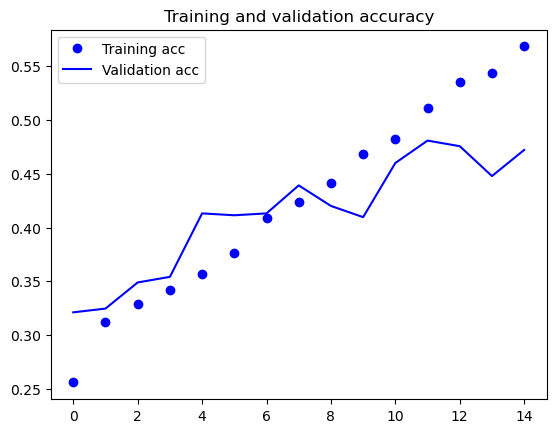

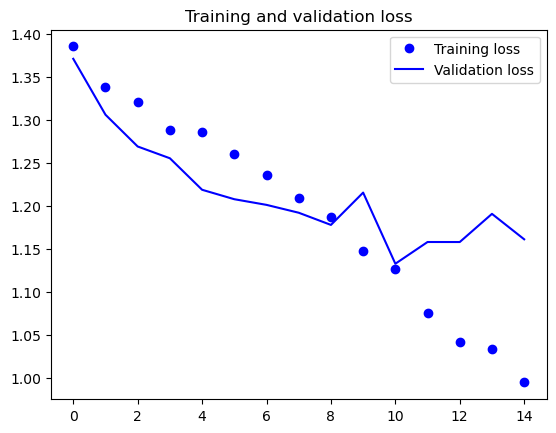

In [7]:
# Visualizing the loss and accuracy of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<a id="mod2"></a>
<h2 name='mod2'>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Model 2: Model Using Transfer Learning
            </span>   
        </font>    
</h2>

<a id="mod"></a>
<h3 name='mod'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Building and Training our model
            </span>   
        </font>    
</h3>

In [10]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers to prevent updating their weights during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add some fully connected layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))  # 4 classes: angry, relaxed, happy, sad

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # You can choose 'val_accuracy' for accuracy monitoring
                               patience=10,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
                               verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)


Found 3200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
100/100 [==============================] - 290s 3s/step - loss: 1.5403 - accuracy: 0.4256 - val_loss: 1.0584 - val_accuracy: 0.5556
Epoch 2/50
100/100 [==============================] - 298s 3s/step - loss: 1.0496 - accuracy: 0.5456 - val_loss: 0.9824 - val_accuracy: 0.6094
Epoch 3/50
100/100 [==============================] - 296s 3s/step - loss: 1.0033 - accuracy: 0.5684 - val_loss: 0.9871 - val_accuracy: 0.5764
Epoch 4/50
100/100 [==============================] - 292s 3s/step - loss: 0.9570 - accuracy: 0.6044 - val_loss: 0.9930 - val_accuracy: 0.5764
Epoch 5/50
100/100 [==============================] - 316s 3s/step - loss: 0.9232 - accuracy: 0.6106 - val_loss: 0.9364 - val_accuracy: 0.5816
Epoch 6/50
100/100 [==============================] - 264s 3s/step - loss: 0.8944 - accuracy: 0.6222 - val_loss: 0.9149 - val_accuracy: 0.6007
Epoch 7/50
100/100 [==============================] - 262s 

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 18911556 (72.14 MB)
Trainable params: 4196868 (16.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


<a id="mod"></a>
<h3 name='mod'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Saving our Model
            </span>   
        </font>    
</h3>

In [11]:
model.save('dog_emotions_2')

INFO:tensorflow:Assets written to: dog_emotions_2\assets


INFO:tensorflow:Assets written to: dog_emotions_2\assets


<a id="mod"></a>
<h3 name='mod'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Model Evaluation
            </span>   
        </font>    
</h3>

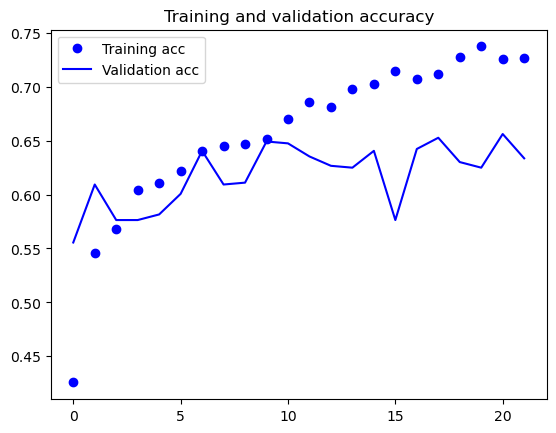

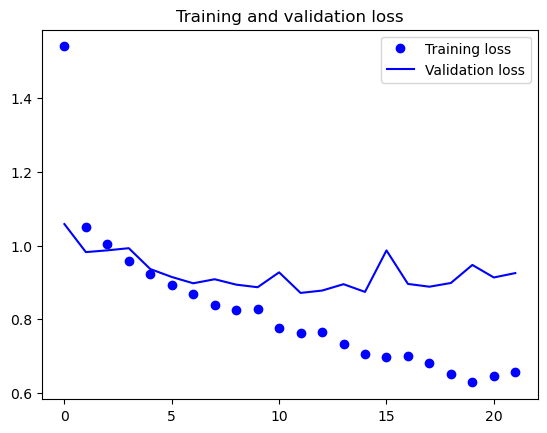

In [12]:
# Visualizing the loss and accuracy of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<a id="mod"></a>
<h2 name='mod'>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Testing and Deployment
            </span>   
        </font>    
</h2>


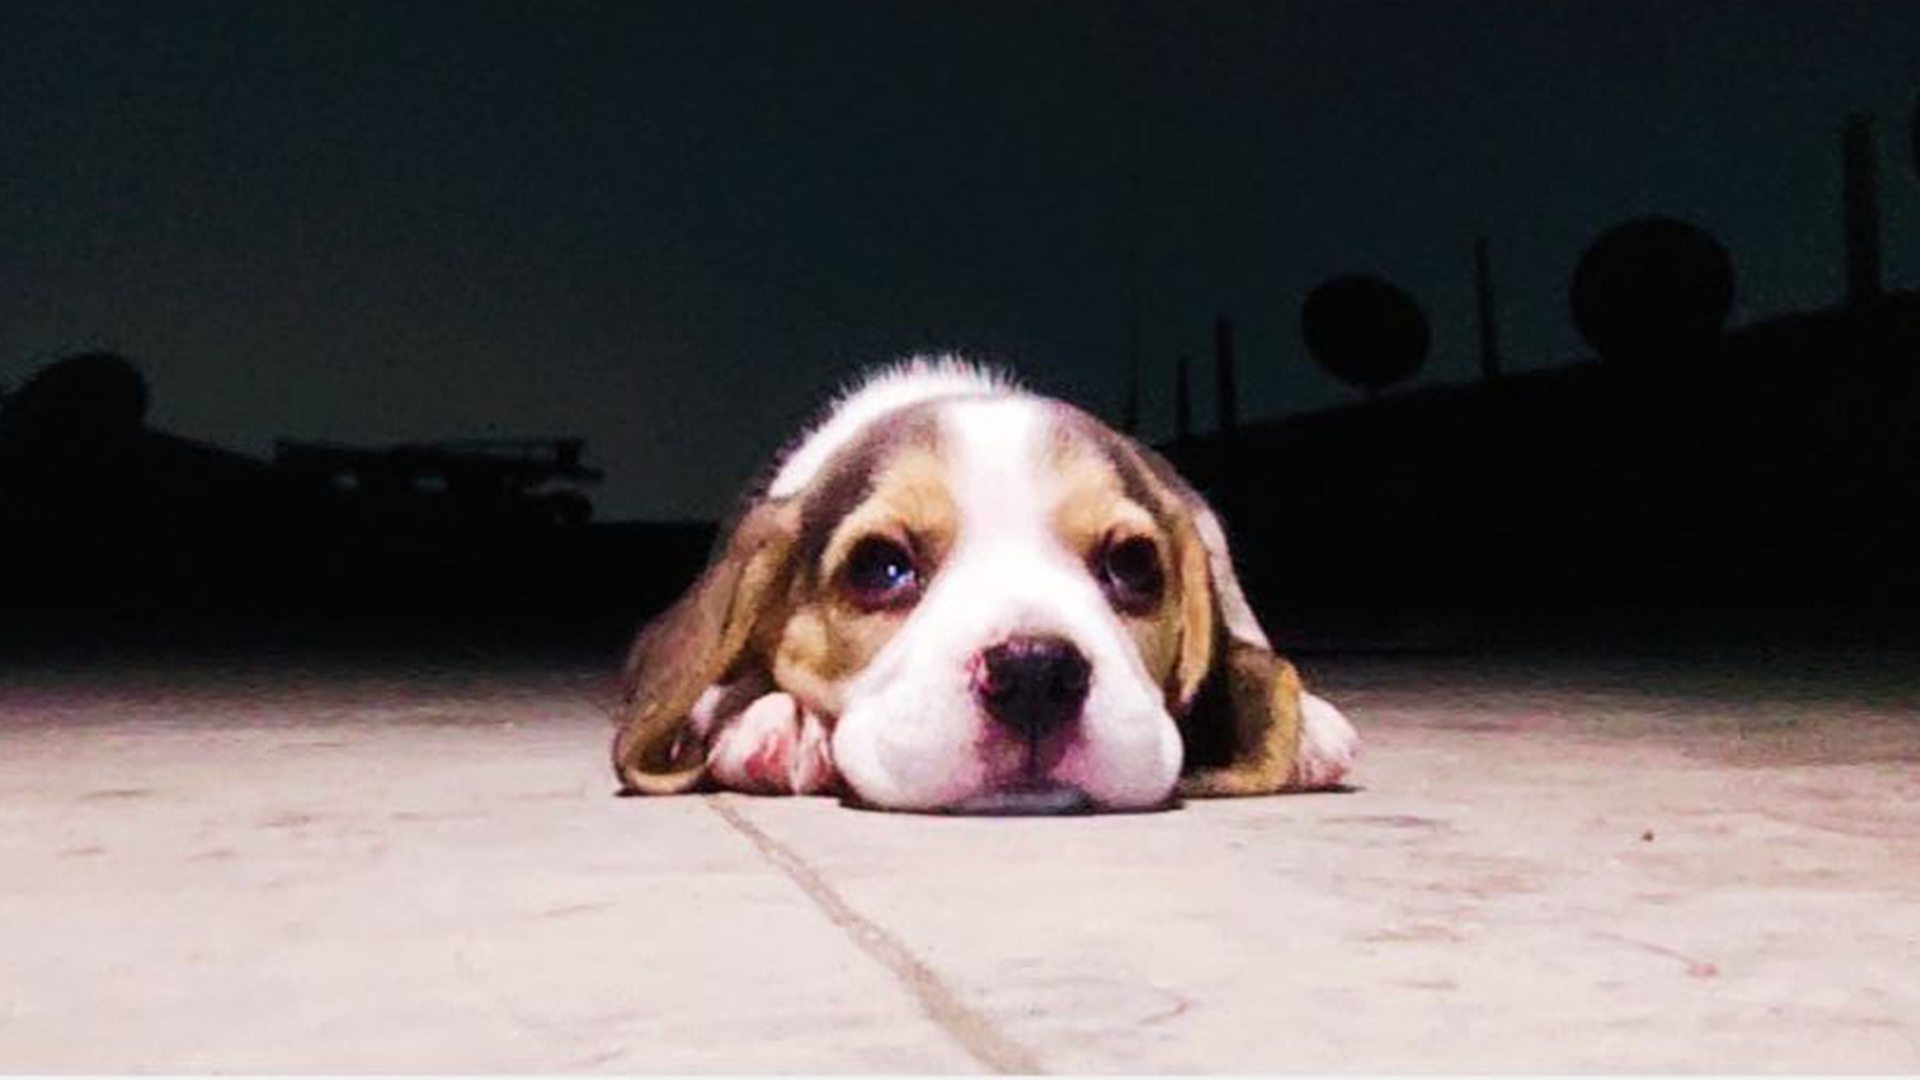

In [13]:
input_img = load_img('ginger.png', color_mode = "rgb")
input_img

In [17]:
# Load and preprocess the image
img_path = 'ginger.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get model predictions
predictions = model.predict(img_array)

# Assuming predictions is a 2D array with shape (1, 4)
predicted_class_index = np.argmax(predictions)
class_labels = ['angry', 'relaxed', 'happy', 'sad']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]
predicted_class_probability = predictions[0, predicted_class_index]

# Display the predicted class label and its probability
print(f"Predicted class: {predicted_class_label}")
print(f"Probability: {predicted_class_probability:.2f}")

# Display probabilities for all classes
all_class_probabilities = zip(class_labels, predictions[0])
for class_label, probability in all_class_probabilities:
    print(f"{class_label}: {probability:.2f}")


1/1 [==============================] - 0s 131ms/step
Predicted class: sad
Probability: 1.00
angry: 0.00
relaxed: 0.00
happy: 0.00
sad: 1.00


<a id="mod"></a>
<h3 name='mod'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Feature Map Analysis
            </span>   
        </font>    
</h3>

**Viewing the feature maps**

In [18]:
img = load_img('ginger.png', target_size=(224, 224))    # Loading an Image
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
input_shape = x.shape
print(f"The Input Shape is: {input_shape[1:]}")

# Assuming number of filters to be outputted are 32 for a convolutional window of (3,3)
# Get the output tensor y for the convolutional operation over x
y = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape[1:])(x)
print(f"The Tensor Shape is: {y.shape}")  # This will give the output feature map comprising of (sample, height, width, depth) where depth axis is no. of filters

The Input Shape is: (224, 224, 3)
The Tensor Shape is: (1, 222, 222, 32)


**Viewing the output of convolutional 2d layer the feature maps with various filters**

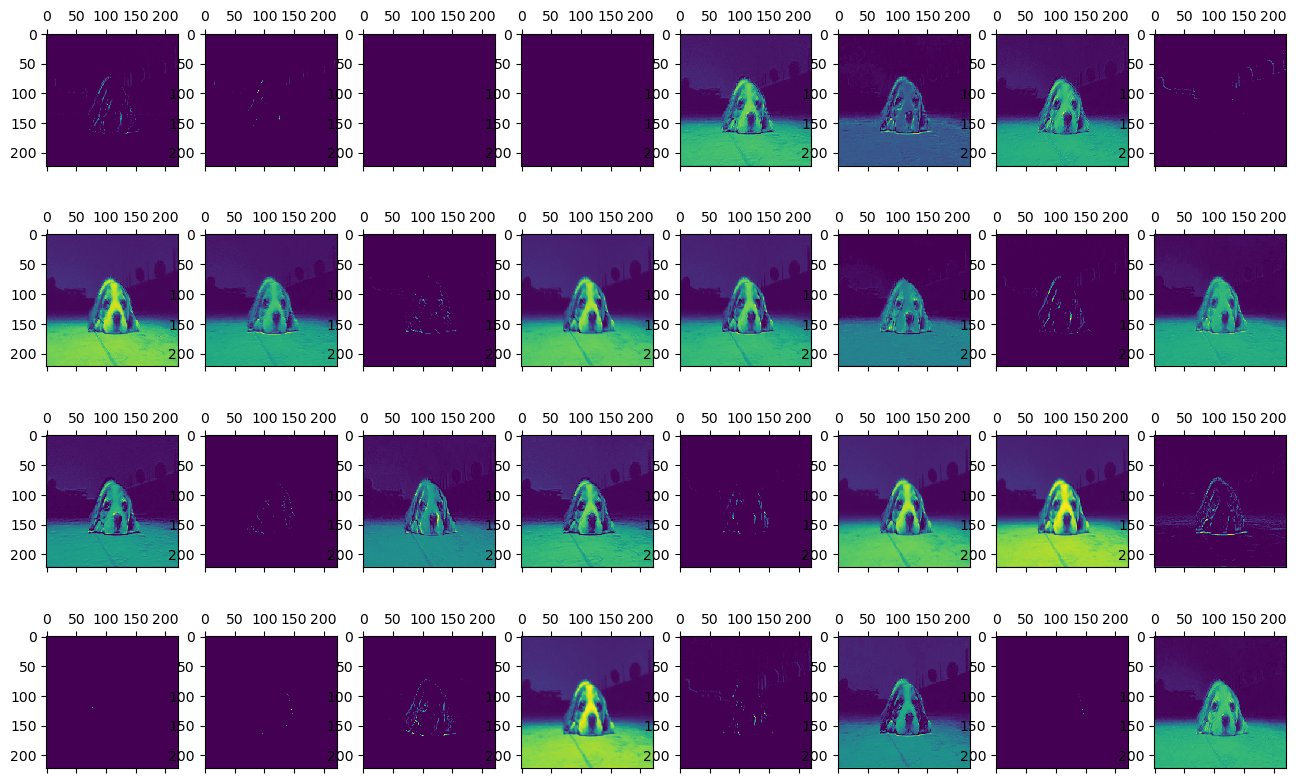

In [19]:
filter_no = 0
row = 0
col = 0
fig, axes = plt.subplots(4,8,figsize = (16,10)) # create the arrangement in 4 rows , 8 columns 

# Iterate through each filters 
for filter_no in range(0,32,1):
    axes[row,col].matshow(y[0, :, :, filter_no], cmap='viridis' )
    
    # below logic is for creating subplot axes indices 
    col = col + 1
    if (col > 7):
        col = 0
        row = row + 1

plt.show()
    

**Viewing the output of maxpooling 2d layer**

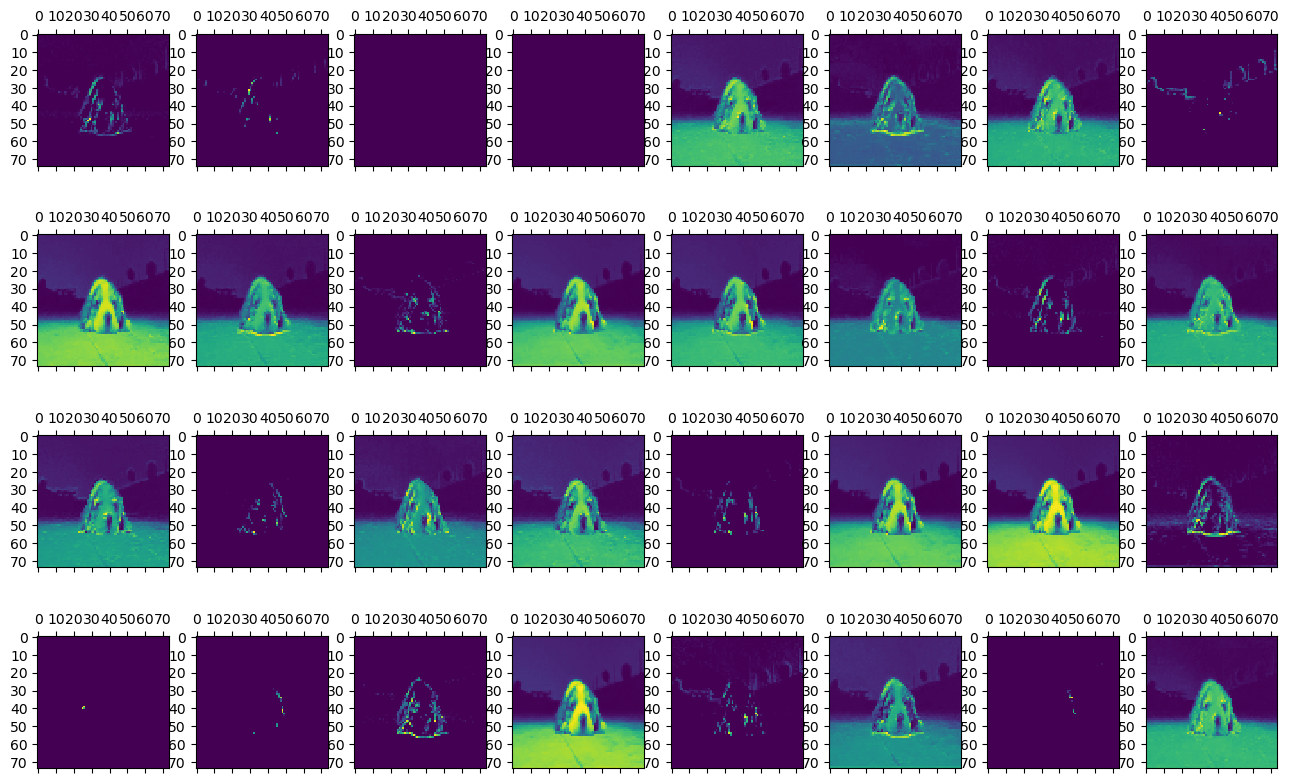

In [20]:
z = tf.keras.layers.MaxPooling2D((3, 3))(y)

filter_no = 0
row = 0
col = 0
fig, axes = plt.subplots(4,8,figsize = (16,10))  # create the arrangement in 4 rows , 8 columns

# Iterate through each filters 
for filter_no in range(0,32,1):
    axes[row,col].matshow(z[0, :, :, filter_no], cmap='viridis' )
    # below logic is for creating subplot axes indices 
    col = col + 1
    if (col > 7):
        col = 0
        row = row + 1

plt.show()